# Module X - Visualization

---

## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from random import randint
import seaborn as sb

%matplotlib inline

---

## Load Data

In [2]:
data_dir = r'C:\Users\alexa\Documents\GeorgiaTech\Classes\Year4\CS4641'
datasets = os.listdir(data_dir)
print(datasets)

X = pd.read_csv(data_dir + '\\' + datasets[0])

y = X['Severity']
y = np.reshape(y, (y.shape[0], 1))

['US_Accidents_Dec19.csv', 'US_WeatherEvents_2016-2019.csv']


C:\Users\alexa\AppData\Local\Programs\Python\Python36\lib\site-packages\numpy\core\fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


In [3]:
print(X.shape)
print(y.shape)

(2974335, 49)
(2974335, 1)


## Country Map

Severity Count: 968, 1993410, 887620, 92337


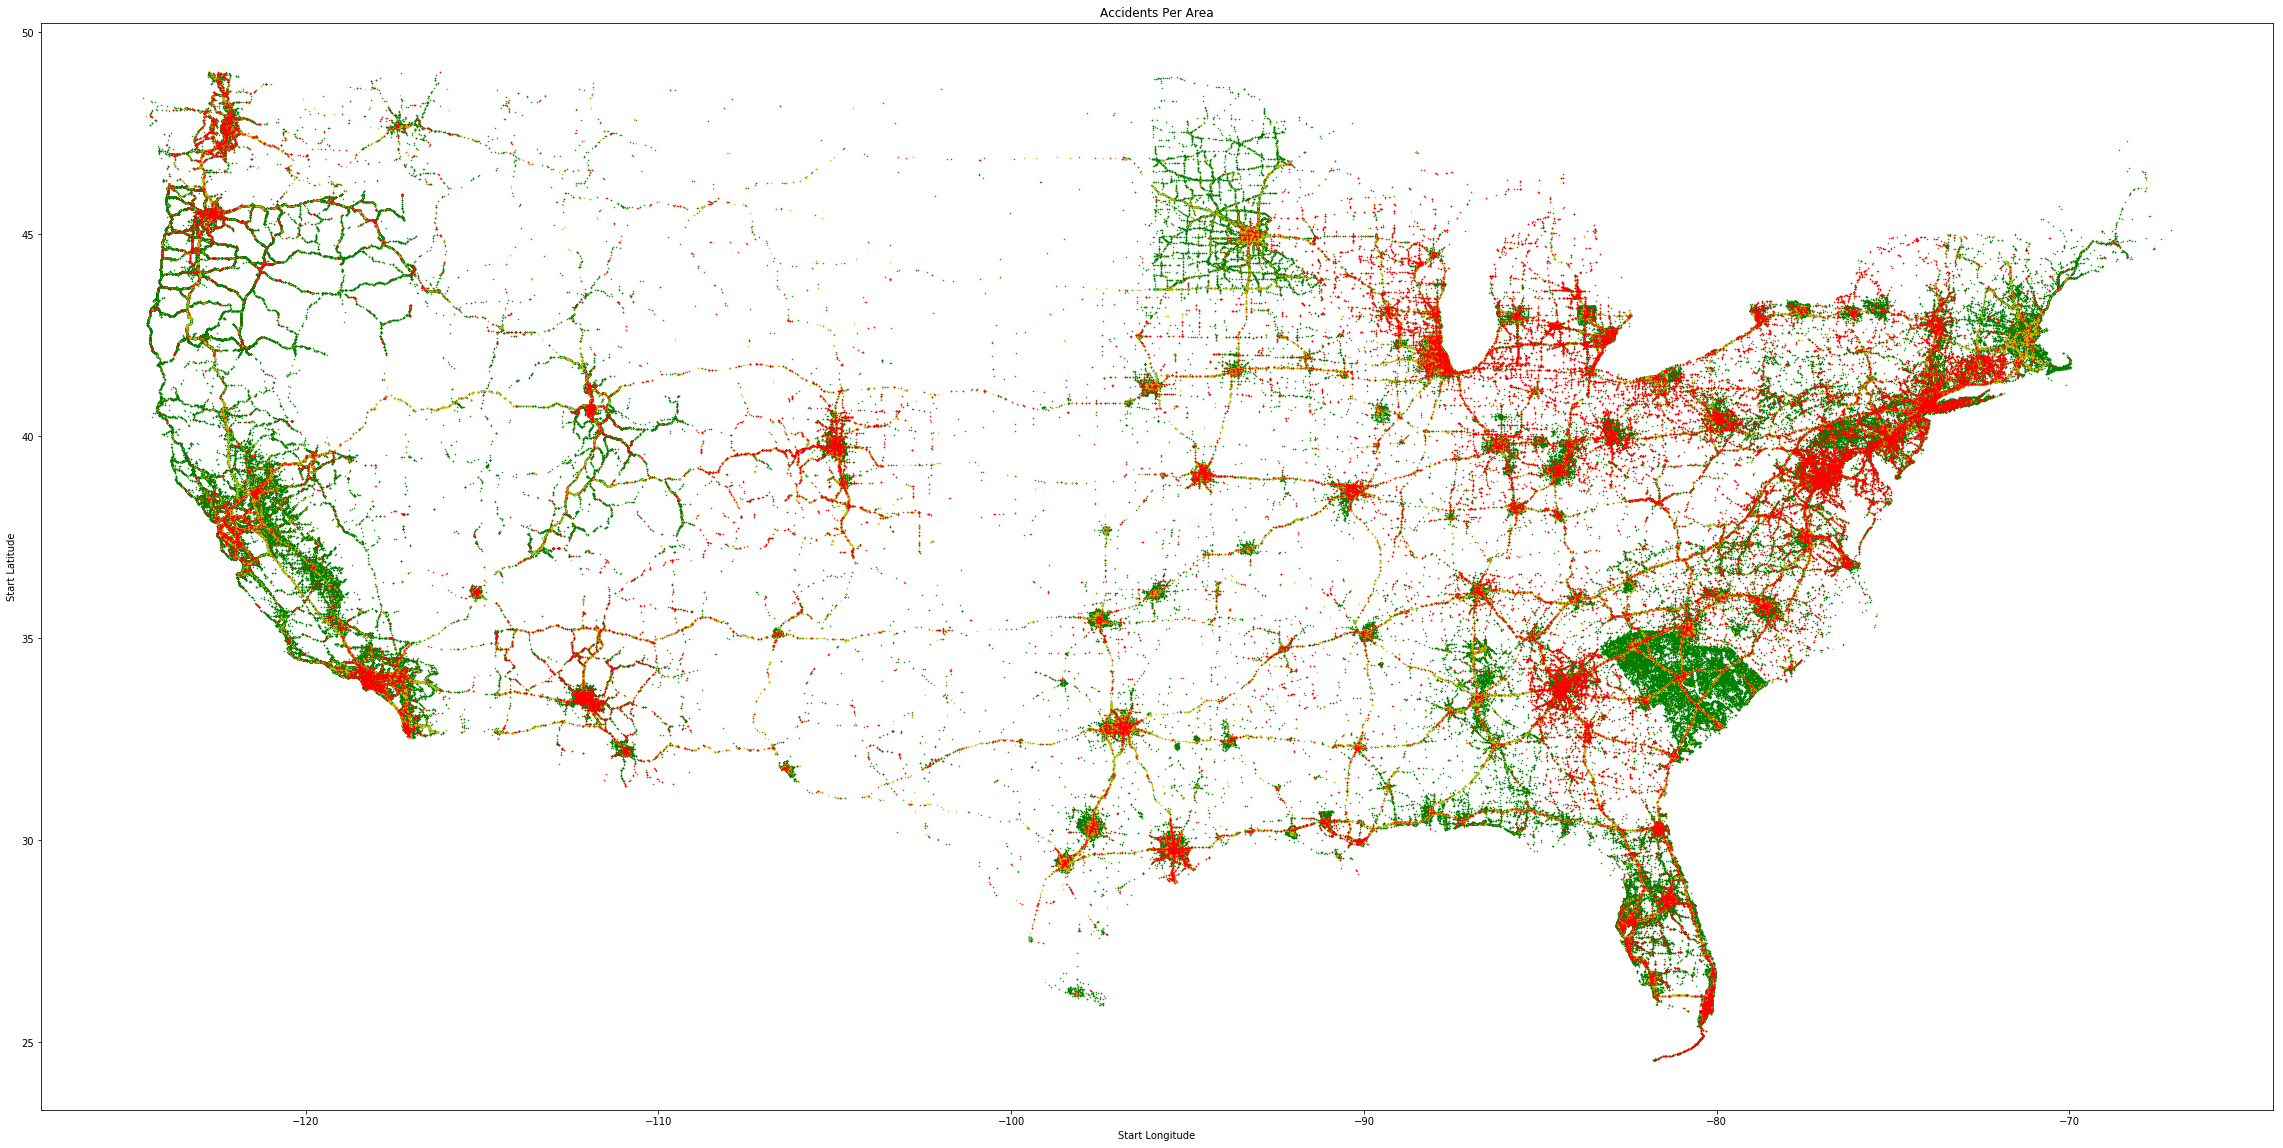

In [4]:
fig = plt.figure(figsize=(40, 20))
ax = fig.add_subplot(111)
plt.title('Accidents Per Area')
plt.xlabel('Start Longitude')
plt.ylabel('Start Latitude')

severity1 = np.where(y == 1)
severity2 = np.where(y == 2)
severity3 = np.where(y == 3)
severity4 = np.where(y == 4)

print('Severity Count: %d, %d, %d, %d' % (len(severity1[0]), len(severity2[0]), len(severity3[0]), len(severity4[0])))

ax.scatter(X.iloc[severity1[0]]['Start_Lng'], X.iloc[severity1[0]]['Start_Lat'], marker='.', color='b', s=1)
ax.scatter(X.iloc[severity2[0]]['Start_Lng'], X.iloc[severity2[0]]['Start_Lat'], marker='.', color='g', s=1)
ax.scatter(X.iloc[severity3[0]]['Start_Lng'], X.iloc[severity3[0]]['Start_Lat'], marker='.', color='y', s=1)
ax.scatter(X.iloc[severity4[0]]['Start_Lng'], X.iloc[severity4[0]]['Start_Lat'], marker='.', color='r', s=1)

plt.show()

## City Map

In [5]:
city_counts = X.groupby('City').count().reset_index()
city_counts = city_counts.sort_values(by='State', ascending=False)
print(city_counts)

                      City     ID  Source    TMC  Severity  Start_Time  \
4792               Houston  93289   93289  80967     93289       93289   
1744             Charlotte  68054   68054  55694     68054       68054   
5944           Los Angeles  65851   65851  45804     65851       65851   
416                 Austin  58703   58703  57151     58703       58703   
2452                Dallas  58036   58036  47844     58036       58036   
8567               Raleigh  39628   39628  37159     39628       39628   
385                Atlanta  37591   37591  30012     37591       37591   
6572                 Miami  31160   31160  21990     31160       31160   
7634         Oklahoma City  30787   30787  29772     30787       30787   
572            Baton Rouge  30232   30232  29353     30232       30232   
7054             Nashville  27855   27855  25198     27855       27855   
7748               Orlando  26138   26138  20134     26138       26138   
9080            Sacramento  25657   25

In [6]:
city = 'Houston'
city_info = city_counts.loc[city_counts['City'] == city]
# print(city_info)

city_index = X.index[X['City'] == city].tolist()
Xcity = X.iloc[city_index].copy(deep=True)
print(Xcity.shape)
Xcity.head()

ycity = np.copy(y[city_index])
print(ycity.shape)

(93289, 49)
(93289, 1)


In [7]:
current_dir = os.getcwd()
save_dir = current_dir + '\\moduleX_data\\'+city
print(save_dir)
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

C:\Users\alexa\Documents\GitHub\traffic-accident-weather-analysis\code\moduleX_data\Houston


In [8]:
#remove data points that are physically not near the city center +/- 3std

print(np.mean(Xcity['Start_Lng']))
print(np.mean(Xcity['Start_Lat']))
print(np.std(Xcity['Start_Lng']))
print(np.std(Xcity['Start_Lat']))

m = 3
#don't include points that are away from city center
true_indices_lng = abs(Xcity['Start_Lng'] - np.mean(Xcity['Start_Lng'])) < m * np.std(Xcity['Start_Lng'])
# print(np.sum(1-true_indices_lng))

true_indices_lat = abs(Xcity['Start_Lat'] - np.mean(Xcity['Start_Lat'])) < m * np.std(Xcity['Start_Lat'])
# print(np.sum(1-true_indices_lat))

true_indices = np.logical_and(true_indices_lng, true_indices_lat)
# print(np.sum(1-true_indices))

# print(np.max(Xcity.iloc[np.where(true_indices==1)]['Start_Lat']))
# print(np.min(Xcity.iloc[np.where(true_indices==1)]['Start_Lat']))
# print(np.max(Xcity.iloc[np.where(true_indices==1)]['Start_Lng']))
# print(np.min(Xcity.iloc[np.where(true_indices==1)]['Start_Lng']))

#remove data that is for some reason not near city center
print(Xcity.shape)
print(ycity.shape)
Xcity = Xcity[true_indices]
ycity = ycity[true_indices]
print(Xcity.shape)
print(ycity.shape)

-95.419925530577
29.764370582844702
0.18641807283793058
0.3017424397247273
(93289, 49)
(93289, 1)
(93245, 49)
(93245, 1)


Severity Count: 48, 72403, 20043, 751
93245


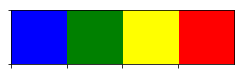

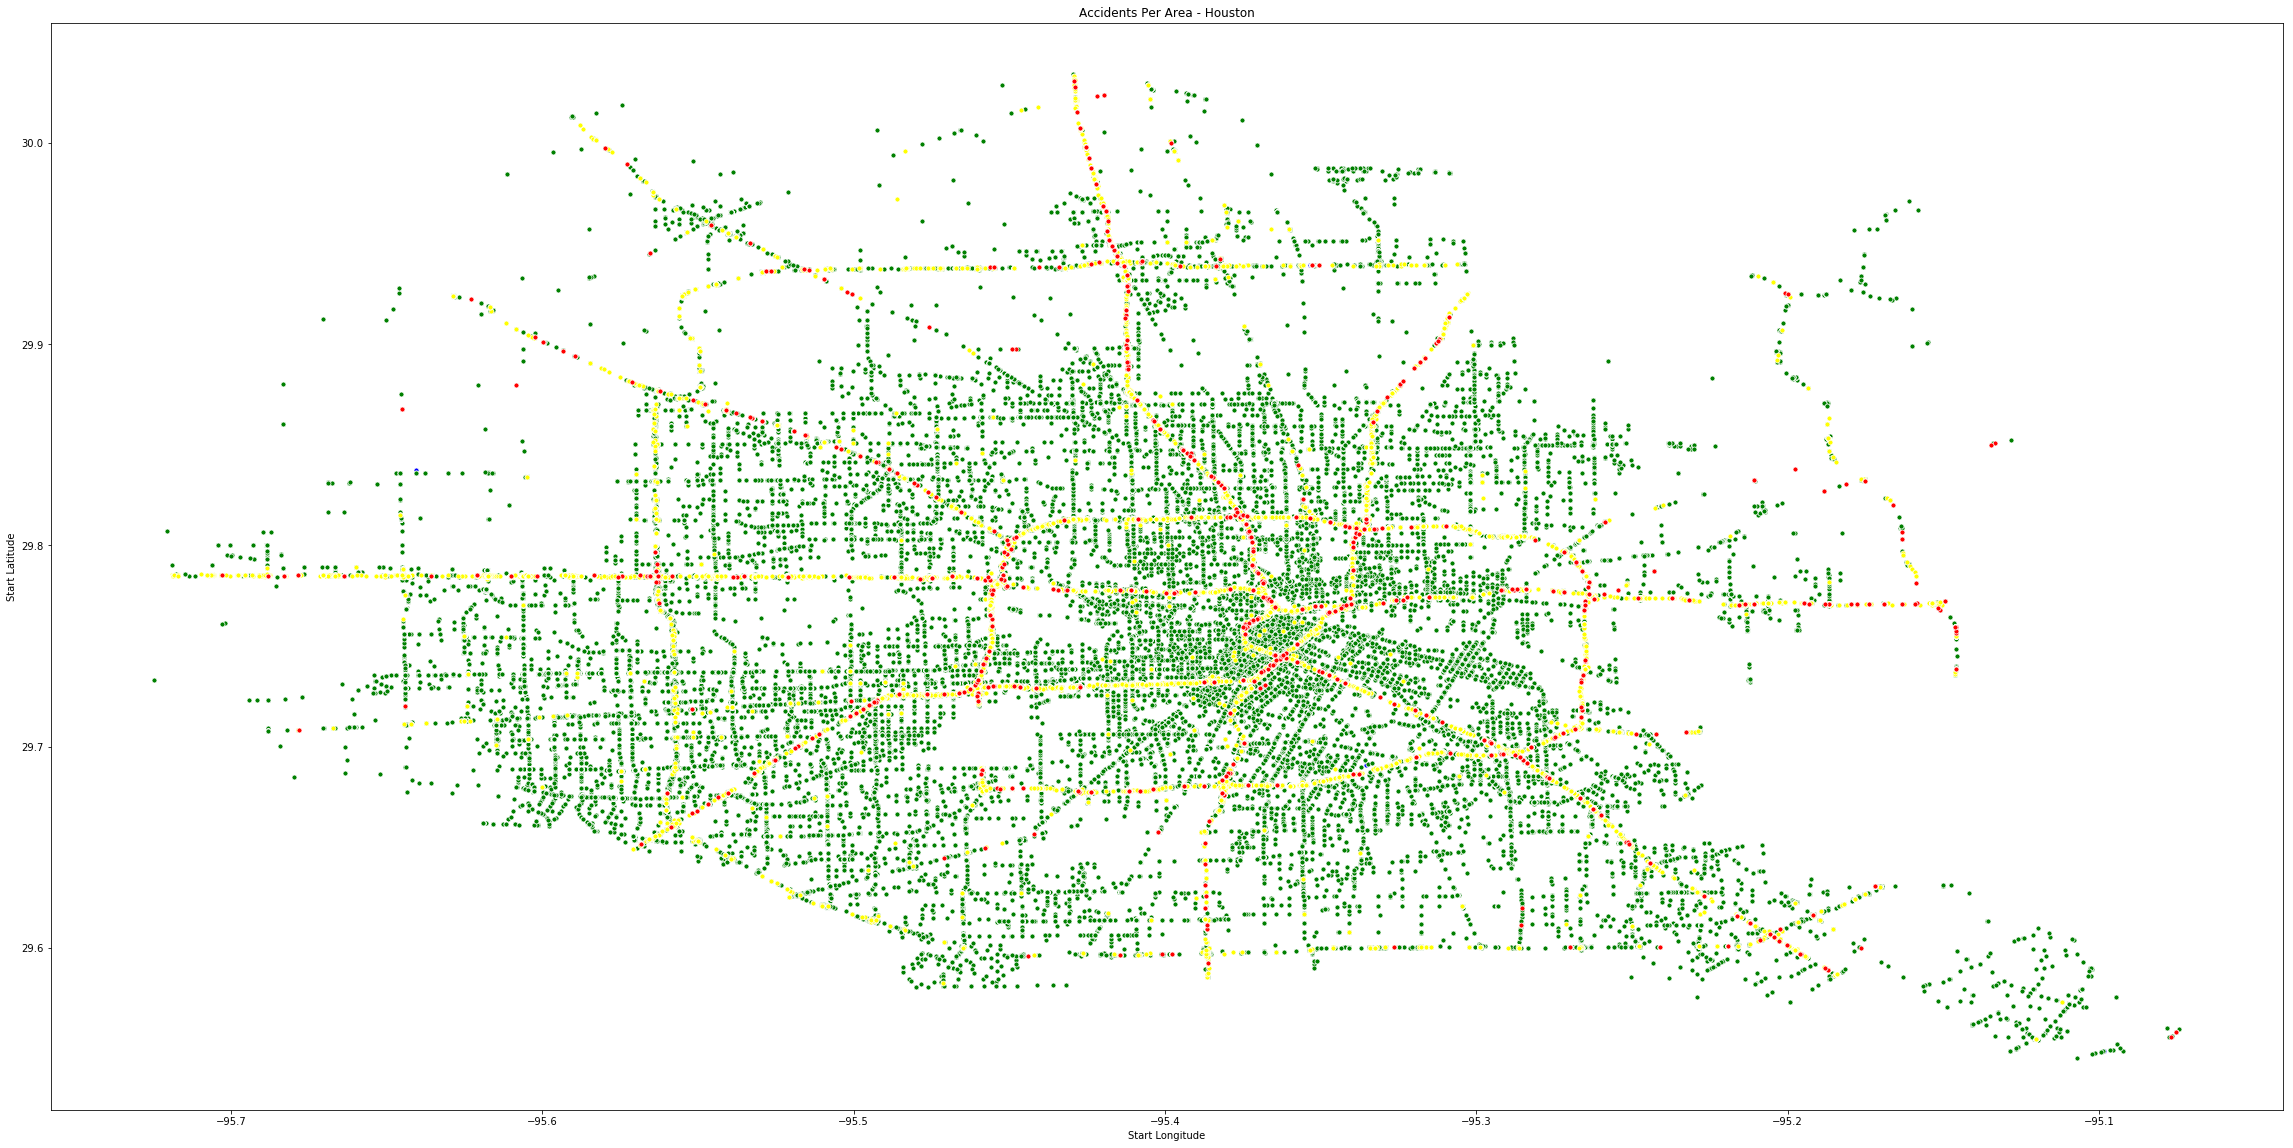

In [58]:
# https://seaborn.pydata.org/generated/seaborn.scatterplot.html
# https://seaborn.pydata.org/tutorial/color_palettes.html
# https://xkcd.com/color/rgb/

severity1 = np.where(ycity == 1)
severity2 = np.where(ycity == 2)
severity3 = np.where(ycity == 3)
severity4 = np.where(ycity == 4)

print('Severity Count: %d, %d, %d, %d' % (len(severity1[0]), len(severity2[0]), len(severity3[0]), len(severity4[0])))
print(np.sum([len(severity1[0]), len(severity2[0]), len(severity3[0]), len(severity4[0])]))

pallette = ["blue", "green", "yellow", "red"]
sb.palplot(sb.color_palette(pallette))
sb.set_palette(pallette)

size = 25

fig, ax = plt.subplots(figsize=(40, 20))
ax = sb.scatterplot(x="Start_Lng", y="Start_Lat", data=Xcity.iloc[severity1[0]], s=size)
ax = sb.scatterplot(x="Start_Lng", y="Start_Lat", data=Xcity.iloc[severity2[0]], s=size)
ax = sb.scatterplot(x="Start_Lng", y="Start_Lat", data=Xcity.iloc[severity3[0]], s=size)
ax = sb.scatterplot(x="Start_Lng", y="Start_Lat", data=Xcity.iloc[severity4[0]], s=size)
plt.title('Accidents Per Area - ' + city)
plt.xlabel('Start Longitude')
plt.ylabel('Start Latitude')
plt.show()

fig.savefig(save_dir+'\\map_true.png')

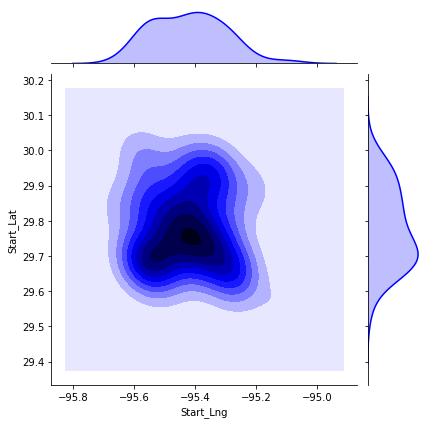

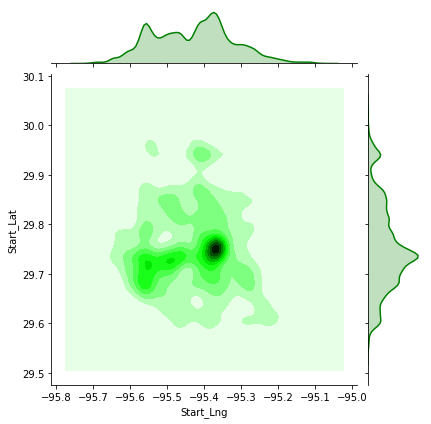

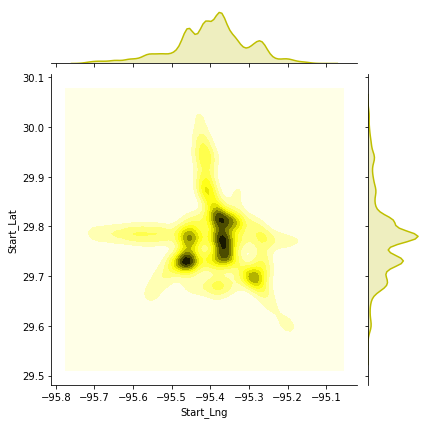

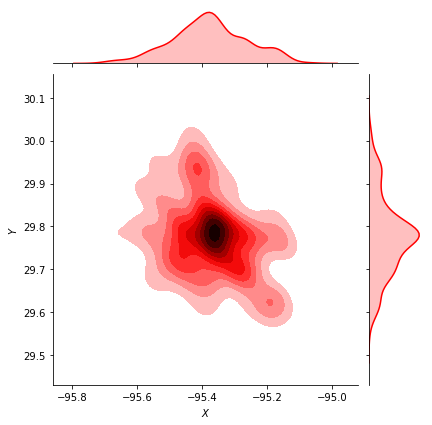

In [71]:
g = sb.jointplot(x="Start_Lng", y="Start_Lat", data=Xcity.iloc[severity1[0]], kind="kde", color="b")
g = sb.jointplot(x="Start_Lng", y="Start_Lat", data=Xcity.iloc[severity2[0]], kind="kde", color="g")
g = sb.jointplot(x="Start_Lng", y="Start_Lat", data=Xcity.iloc[severity3[0]], kind="kde", color="y")
g = sb.jointplot(x="Start_Lng", y="Start_Lat", data=Xcity.iloc[severity4[0]], kind="kde", color="r")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");

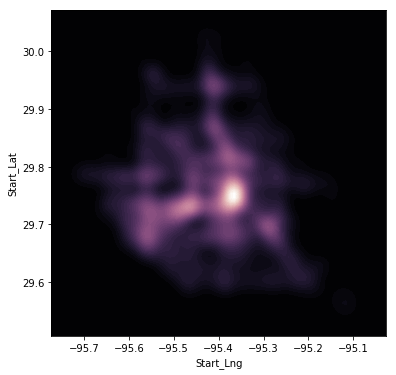

In [76]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sb.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sb.kdeplot(Xcity["Start_Lng"], Xcity["Start_Lat"], cmap=cmap, n_levels=60, shade=True);

Severity Count: 48, 72403, 20043, 751
93245


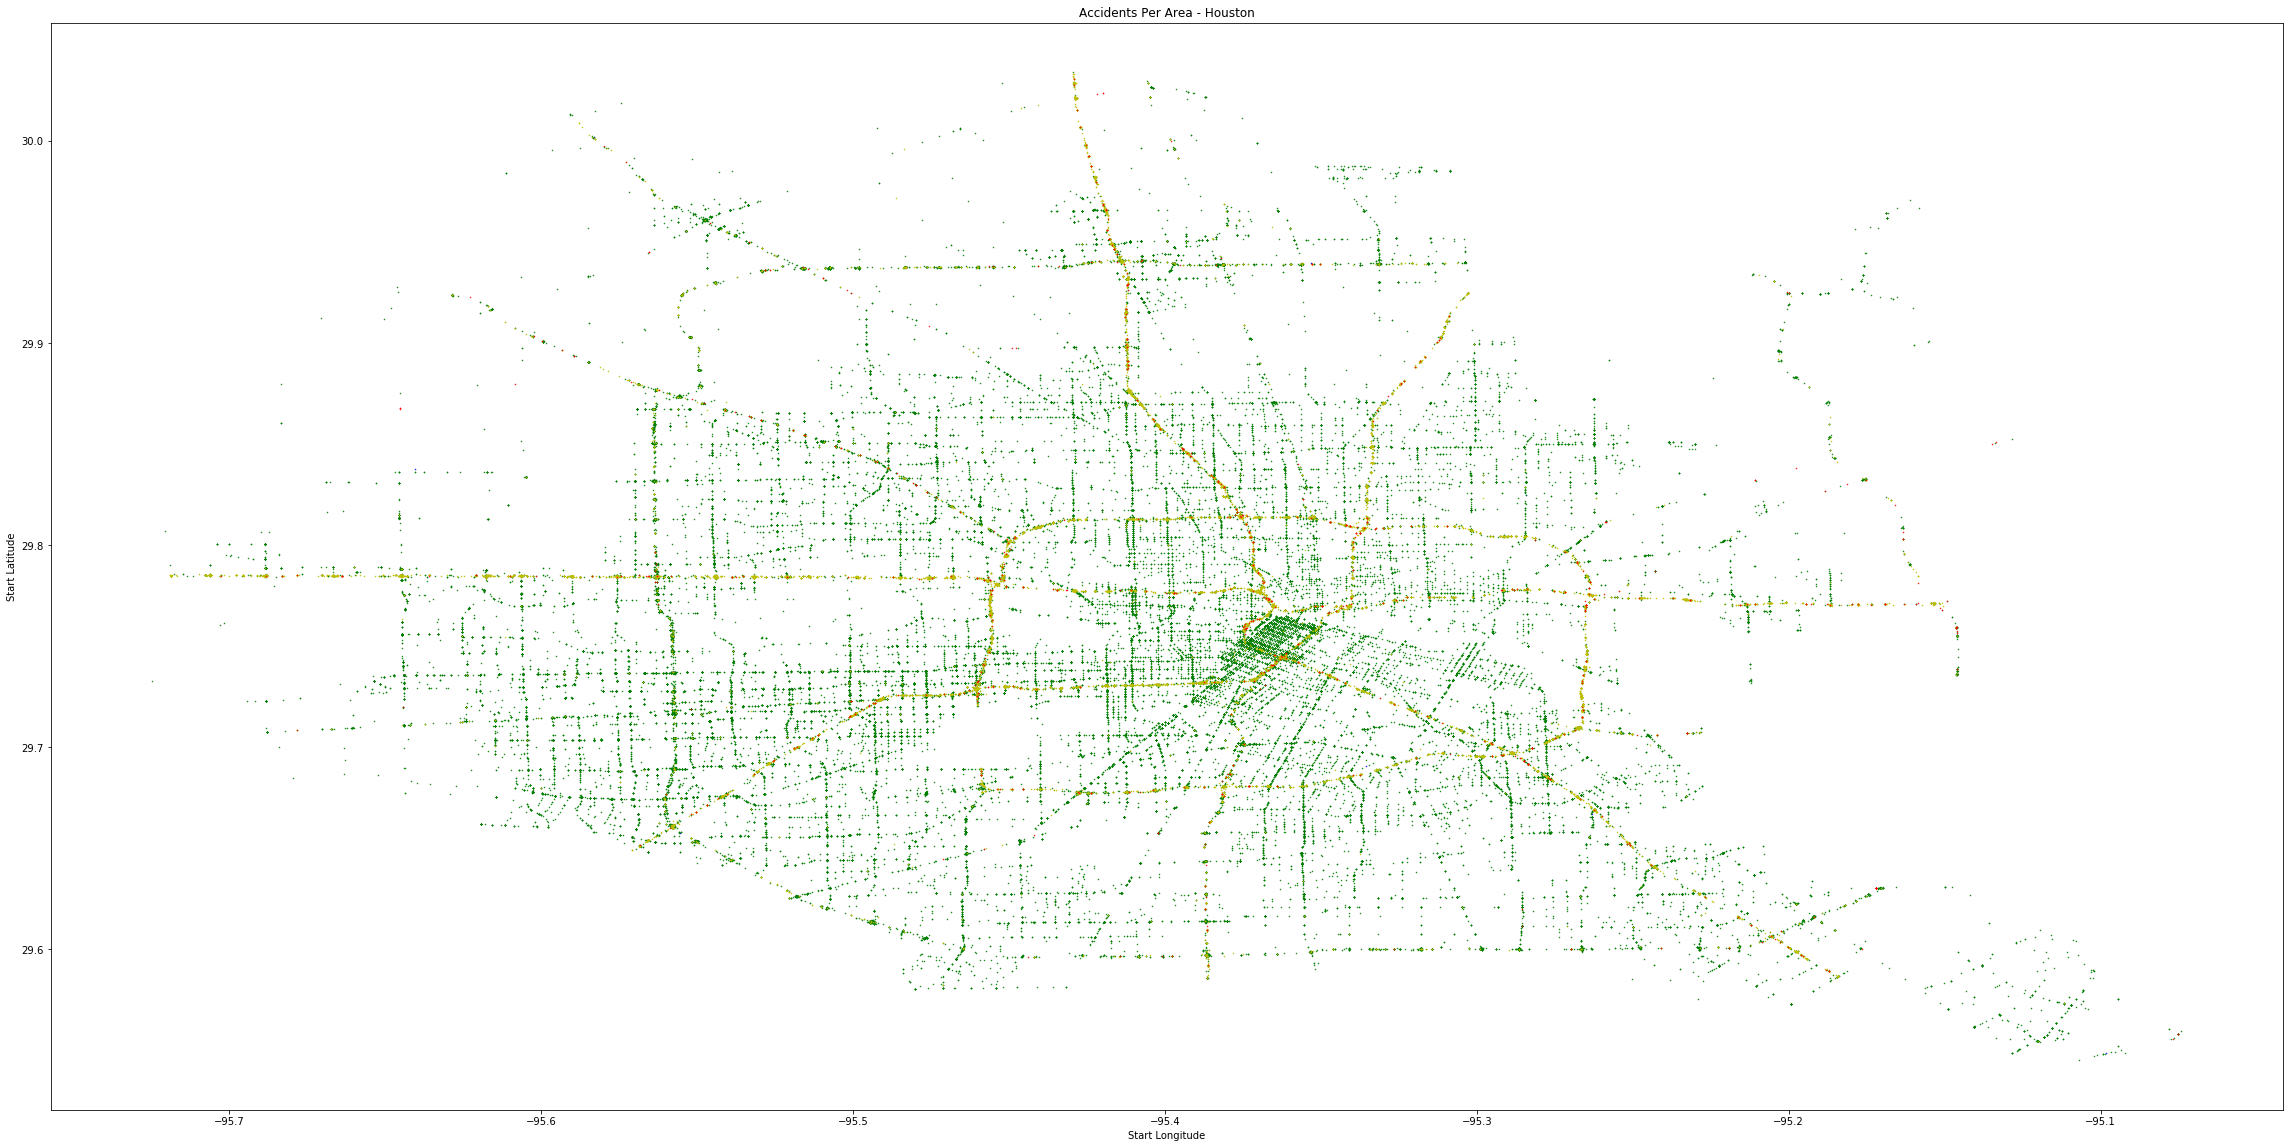

In [142]:
severity1 = np.where(ycity == 1)
severity2 = np.where(ycity == 2)
severity3 = np.where(ycity == 3)
severity4 = np.where(ycity == 4)

print('Severity Count: %d, %d, %d, %d' % (len(severity1[0]), len(severity2[0]), len(severity3[0]), len(severity4[0])))
print(np.sum([len(severity1[0]), len(severity2[0]), len(severity3[0]), len(severity4[0])]))

fig = plt.figure(figsize=(40, 20))
ax = fig.add_subplot(111)
plt.title('Accidents Per Area - ' + city)
plt.xlabel('Start Longitude')
plt.ylabel('Start Latitude')

# ax.scatter(Xcity.iloc[np.where(true_indices==1)]['Start_Lng'], Xcity.iloc[np.where(true_indices==1)]['Start_Lat'], marker='.', color='b', s=1)
ax.scatter(Xcity.iloc[severity1[0]]['Start_Lng'], Xcity.iloc[severity1[0]]['Start_Lat'], marker='.', color='b', s=1)
ax.scatter(Xcity.iloc[severity2[0]]['Start_Lng'], Xcity.iloc[severity2[0]]['Start_Lat'], marker='.', color='g', s=1)
ax.scatter(Xcity.iloc[severity3[0]]['Start_Lng'], Xcity.iloc[severity3[0]]['Start_Lat'], marker='.', color='y', s=1)
ax.scatter(Xcity.iloc[severity4[0]]['Start_Lng'], Xcity.iloc[severity4[0]]['Start_Lat'], marker='.', color='r', s=1)

plt.show()
fig.savefig(save_dir + '\\map_true.png')

## DBSCAN

In [59]:
from sklearn.cluster import DBSCAN

eps = 0.001
min_samples = 10
clustering = DBSCAN(eps=eps, min_samples=min_samples, p=2)
clustering.fit(Xcity.loc[:, 'Start_Lat':'Start_Lng'])
num_clusters = abs(np.max(clustering.labels_) - np.min(clustering.labels_) + 1)
print(num_clusters)

1710


In [60]:
colors = []
colors.append('#000000')
for i in range(0, num_clusters):
    colors.append('#%06X' % randint(0X222222, 0XFFFFFF))

In [61]:
unique = np.unique(clustering.labels_, return_counts=True)
indices = np.flip(np.argsort(unique[1]), axis=0) #sort counts of cluters in descending order
# print(unique)
# print(indices) #indices for cluster counts in descending order

# print('Label - Count - Color')
# for i in indices:
#     print('%5d - %5d - %s' % (unique[0][i], unique[1][i], colors[i]))

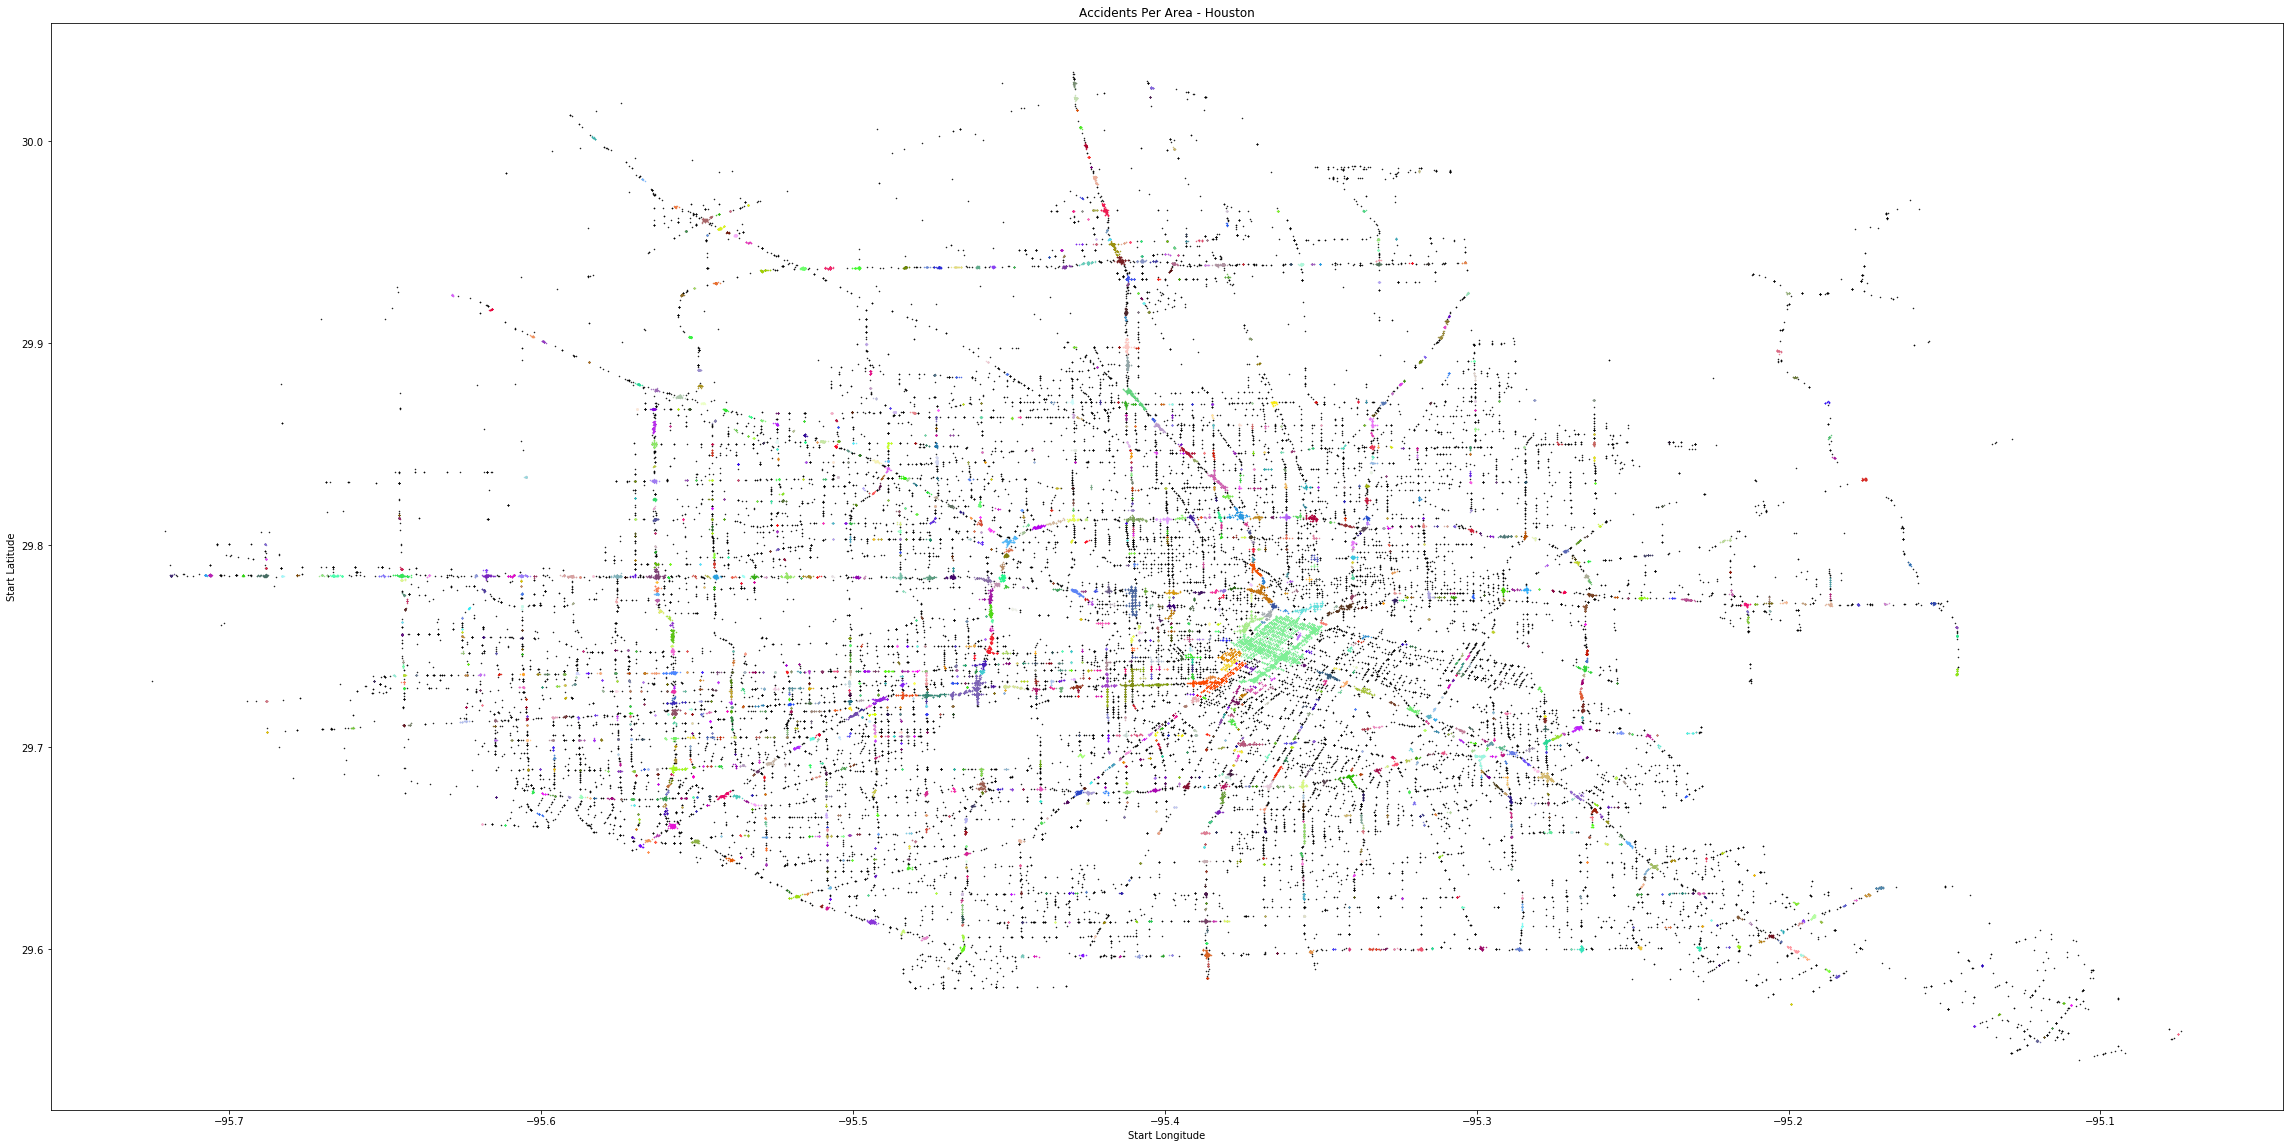

In [62]:
fig = plt.figure(figsize=(40, 20))
ax = fig.add_subplot(111)
plt.title('Accidents Per Area - ' + city)
plt.xlabel('Start Longitude')
plt.ylabel('Start Latitude')

#outliers are index -1, this is 0 in color
# from termcolor import colored, cprint
#colorful
# text = colored('Outliers', 'black', attrs=['blink'])
# print('Outliers in black')

for i in range(-1, num_clusters):
    ax.scatter(Xcity.iloc[np.where(clustering.labels_ == i)]['Start_Lng'], Xcity.iloc[np.where(clustering.labels_ == i)]['Start_Lat'], marker='.', color=colors[i+1], s=1)

plt.show()
fig.savefig(save_dir+'\\map_dbscan_e{:03d}'.format(int(eps*1000))+'_s{:02d}'.format(min_samples)+'.png')

In [64]:
load_dir = current_dir + '\\module1_data\\'+city
filename = load_dir + '\\Xforest_f101'

Xcity_cleaned = np.load(filename+'.npy')
print(Xcity_cleaned.shape)

(93289, 101)


In [ ]:
cluster_means = np.empty((0, Xcity_cleaned.shape[1]))

for i in indices:
    current_cluster = Xcity_cleaned[np.where(clustering.labels_ == unique[0][i])]
    cluster_mean = np.expand_dims(np.mean(current_cluster, axis=0), axis=0)
    cluster_means = np.append(cluster_means, cluster_mean, axis=0)

print(cluster_means.shape)

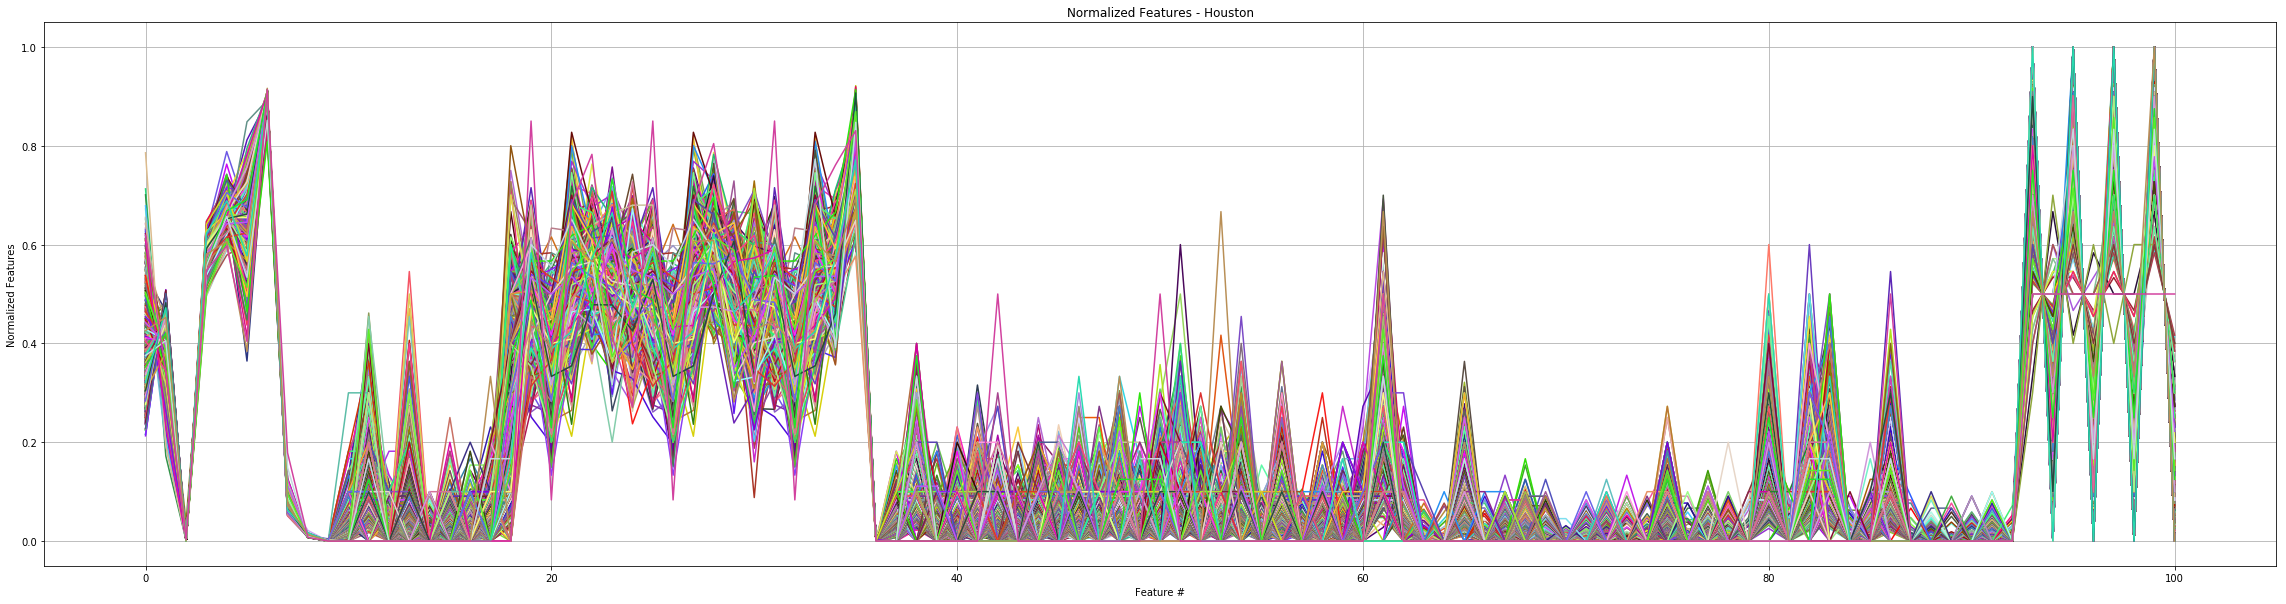

In [159]:
colors = []
colors.append('#000000')
for i in range(0, cluster_means.shape[0]):
    colors.append('#%06X' % randint(0X222222, 0XFFFFFF))

ax = plt.figure(figsize=(40, 10))
plt.grid(True)
for i in range(0, cluster_means.shape[0]):
    plt.plot(range(0, len(range(0, cluster_means.shape[1]))), cluster_means[i, :], color=colors[i])#, s=5)
plt.xlabel('Feature #')
plt.ylabel('Normalized Features')
plt.title('Normalized Features - ' + city)
# plt.savefig(save_dir + '\\normalized_features_scatter.png')
plt.savefig(save_dir + '\\normalized_features_plot.png')

# sb.lineplot(x="timepoint", y="signal", hue="region", style="event", data=cluster_means)

## 3D Histogram

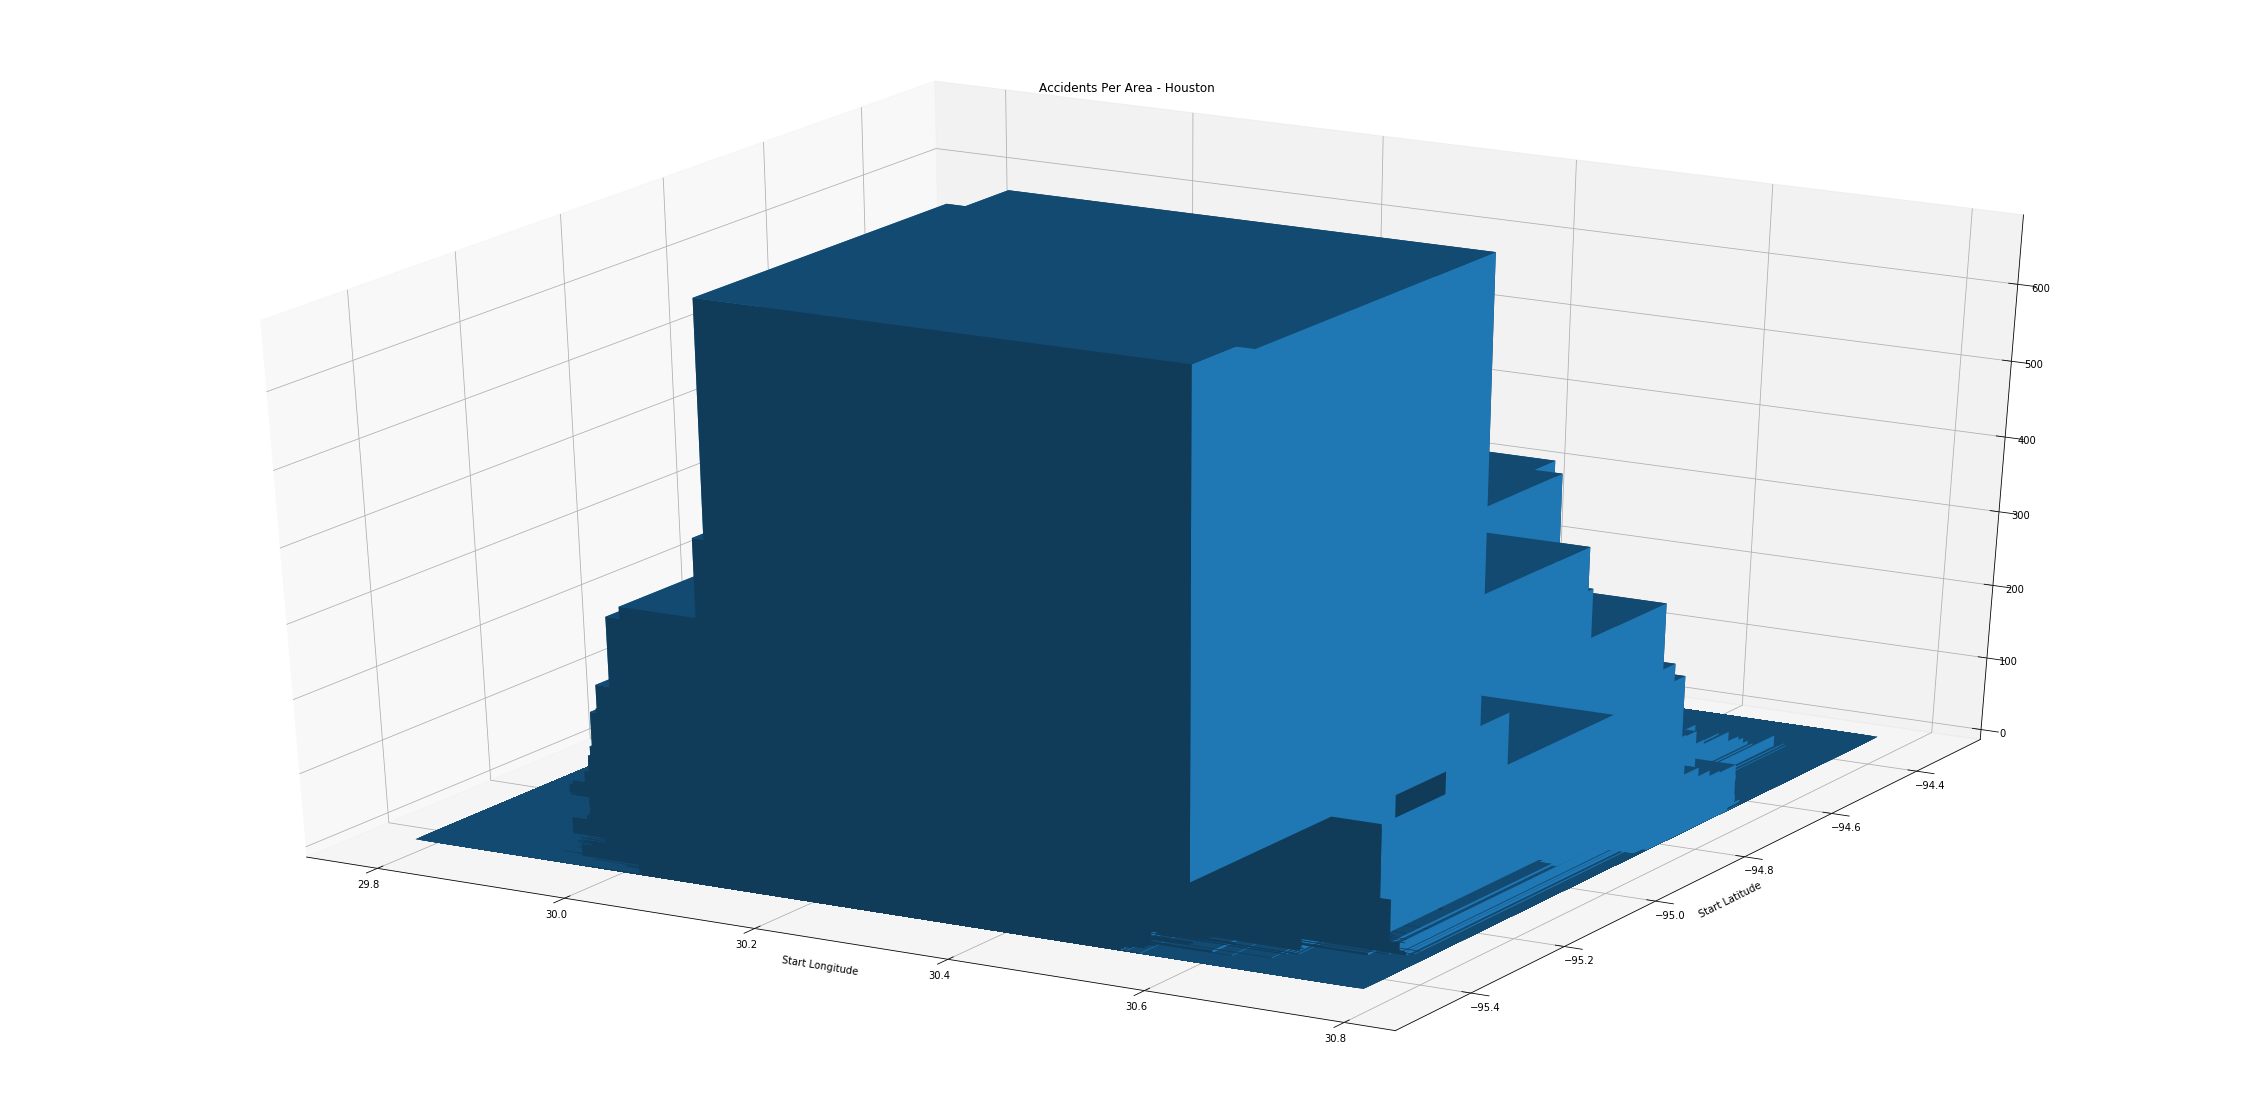

In [245]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(40, 20))
ax = fig.add_subplot(111, projection='3d')

plt.title('Accidents Per Area - ' + city)
plt.xlabel('Start Longitude')
plt.ylabel('Start Latitude')

xmin = np.min(Xcity['Start_Lat'])
xmax = np.max(Xcity['Start_Lat'])
ymin = np.min(Xcity['Start_Lng'])
ymax = np.max(Xcity['Start_Lng'])

hist, xedges, yedges = np.histogram2d(Xcity['Start_Lat'], Xcity['Start_Lng'], bins=100, range=[[xmin, xmax], [ymin, ymax]])

xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25, indexing="ij")
xpos = xpos.ravel()
ypos = ypos.ravel()
zpos = 0

dx = dy = 0.5 * np.ones_like(zpos)
dz = hist.ravel()

ax.bar3d(xpos, ypos, zpos, dx, dy, dz, zsort='average')

plt.show()